# テンプレートマッチング

## テンプレートマッチングとは

テンプレートマッチングとは画像中に存在するテンプレート画像の位置を発見する方法である。

テンプレート画像を入力画像全体にスライド(2D convolutionと同様に)させ、テンプレート画像と画像の注目領域とを比較する。OpenCVではテンプレートと注目領域を比較する方法を幾つか用意している(詳細についてはドキュメントを参照すること)。出力は各画素がテンプレート画像と注目画素の近傍領域の類似度を表すグレースケール画像になる。

入力画像のサイズが (WxH) 、テンプレート画像のサイズが (wxh) の時、出力画像のサイズは (W-w+1, H-h+1) になる。
テンプレートマッチングした後、 cv2.minMaxLoc() 関数を使って、類似度が最大/最小となる画素の位置を調べる。テンプレート画像に最も似ている領域を表す矩形の左上の画素は類似度が最大となる画素の位置、領域のサイズは (w,h) となる。

OpenCvでは cv2.matchTemplate() 関数を使用する。：

**result = cv.matchTemplate(image, template, method[, result[, mask]])**

    引数
        image: 入力画像
        template: テンプレート画像
        method: 比較方法（類似度を計算する方法）
        result: マッチング結果 (引数経由で受け取る場合)
        mask: マスク
    返り値
        result: マッチング結果

<div style="
    position: relative;
    margin: 2em 0;
    padding: 25px 10px 7px;
    border: solid 2px #00B9EF;
">
    <span style="
        position: absolute;
        display: inline-block;
        top: -2px;
        left: -2px;
        padding: 0 9px;
        height: 25px;
        line-height: 25px;
        vertical-align: middle;
        font-size: 17px;
        background: #00B9EF;
        color: #ffffff;
        font-weight: bold;    
    ">Note</span>
    <p>比較方法には下記がある（= で示したのは、代用できる整数値である）。</p>
　TM_SQDIFF = 0 ------------- 差の二乗の合計、小さいほど良くマッチしている<br>
　TM_SQDIFF_NORMED = 1 ---- 同上の正規化<br>
　TM_CCORR = 2 ------------- 乗算したものの合計、大きいほど良くマッチしている<br>
　TM_CCORR_NORMED = 3 ---- 同上の正規化<br>
　TM_CCOEFF = 4 ------------ 相関係数であり、正に大きいほど良くマッチしている<br>
　TM_CCOEFF_NORMED = 5 --- 同上の正規化<br>
    <p>比較方法に cv2.TM_SQDIFF を指定した場合、結果の値が小さいほどテンプレート画像と注目領域が似ていることになるので、注意すること。</p>
</div>

cv2.minMaxLoc() 関数を使って、類似度が最大/最小となる画素の位置を調べる。:

**min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(image)**

    引数
        image: 入力画像
    返り値
        min_val: 最も低い類似度
        max_val: 最も高い類似度
        min_loc: 最も低い類似度の座標
        max_loc: 最も高い類似度の座標

## OpenCVを使ったテンプレートマッチング

ここでは例として、サンプル画像からメッシの顔を探してみる。以下のようなテンプレート画像を用意した:

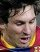

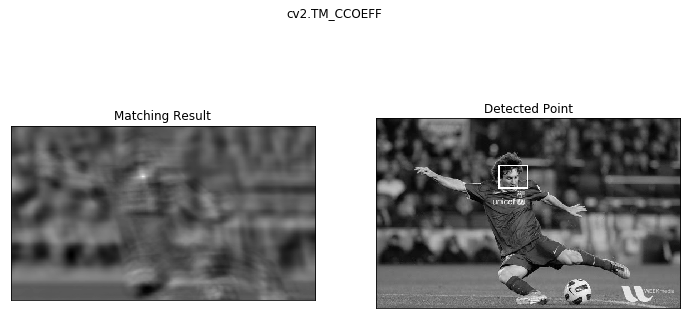

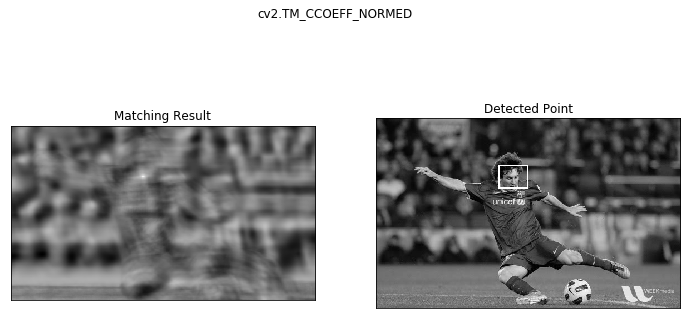

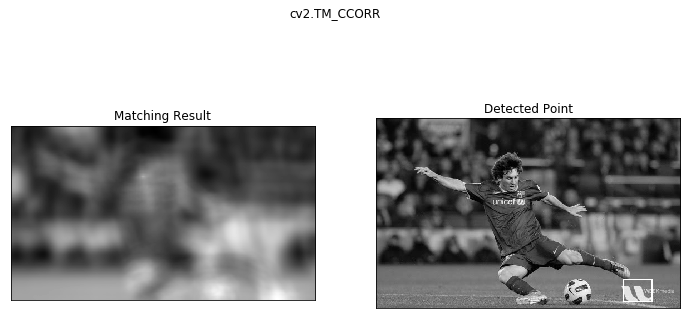

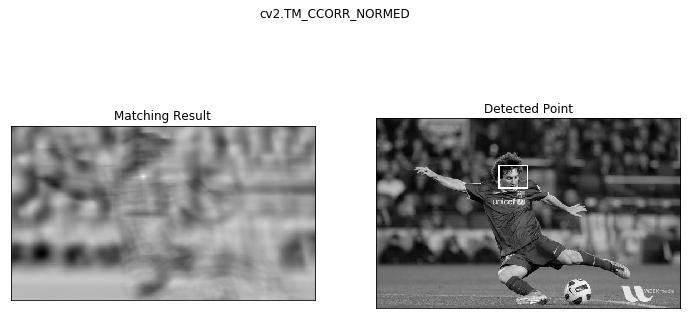

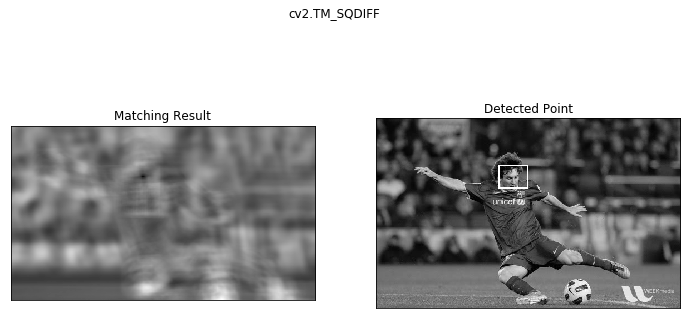

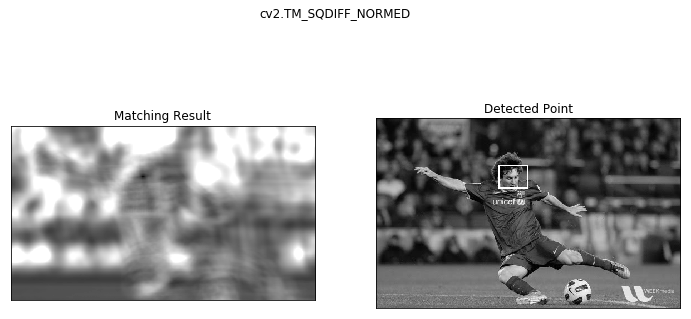

In [25]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('messi5.jpg', 0)
img2 = img.copy()
template = cv2.imread('template.jpg', 0)
w, h = template.shape[:2]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img, top_left, bottom_right, 255, 2)

    plt.figure(figsize=(12, 6))
    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img, cmap='gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

## 複数物体のテンプレートマッチング

対象物体が画像中に複数個出現する場合、 cv2.minMaxLoc() 関数を使っても全ての物体の位置は検出できない。ここでは有名なゲーム Mario のスクリーンショットからコインを検出する。

-0.5386989712715149


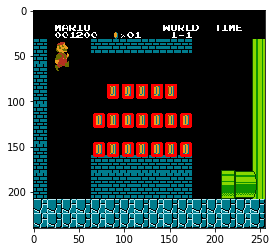

In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_rgb = cv2.imread('mario.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('mario_coin.png',0)
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

print(min_val)

threshold = 0.8
loc = np.where( res >=threshold)

for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)),plt.show();

# サンプルコード

In [1]:
import cv2
import numpy as np
import random
import sys
import math
import os
from scipy import ndimage
import matplotlib.pyplot as plt

(-0.48167452216148376, 0.3835639953613281, (70, 137), (54, 154))
26


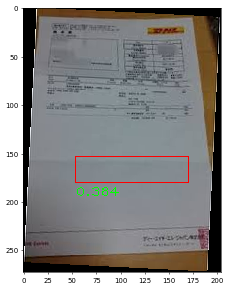

(-0.49223148822784424, 0.3951561450958252, (73, 138), (57, 155))
25


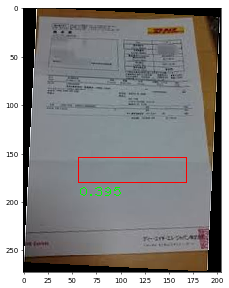

(-0.4687153697013855, 0.4005061686038971, (75, 138), (86, 155))
24


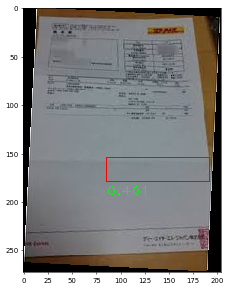

(-0.4700060188770294, 0.42908406257629395, (77, 140), (88, 155))
22


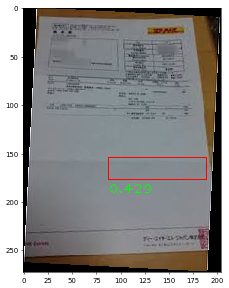

(-0.4571175277233124, 0.4460085928440094, (96, 6), (92, 156))
21


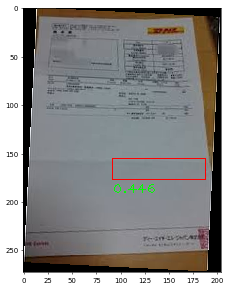

(-0.4755035638809204, 0.4542574882507324, (99, 7), (95, 156))
20


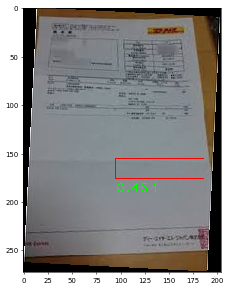

(-0.47793933749198914, 0.43727192282676697, (103, 7), (97, 156))
19


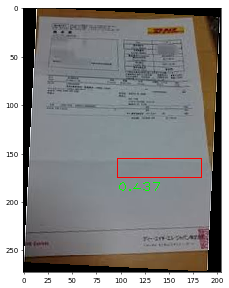

(-0.5207566618919373, 0.43689247965812683, (106, 8), (88, 156))
18


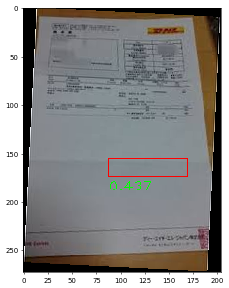

(-0.5375484228134155, 0.44444963335990906, (110, 8), (88, 156))
17


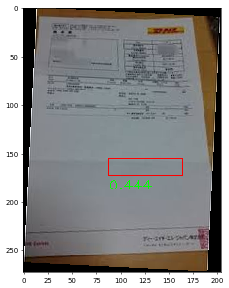

(-0.5382528305053711, 0.4569189250469208, (114, 9), (91, 156))
16


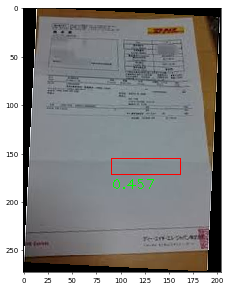

(-0.5753361582756042, 0.482578843832016, (119, 9), (95, 157))
15


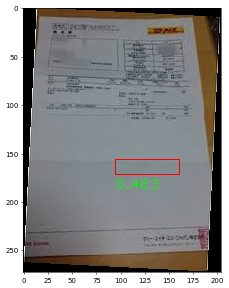

(-0.5477555394172668, 0.491193026304245, (123, 10), (96, 157))
13


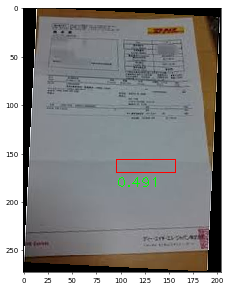

(-0.5064636468887329, 0.5489410758018494, (127, 10), (121, 19))
12


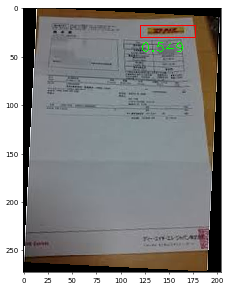

(-0.4864654839038849, 0.5914567708969116, (32, 9), (124, 19))
11


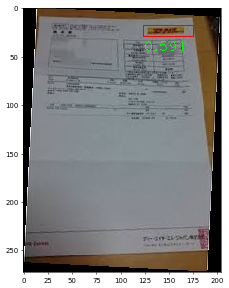

(-0.49093207716941833, 0.61832594871521, (143, 243), (126, 20))
10


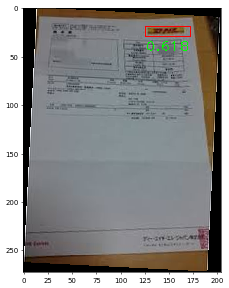

(-0.4984898269176483, 0.5959787368774414, (41, 103), (127, 20))
9


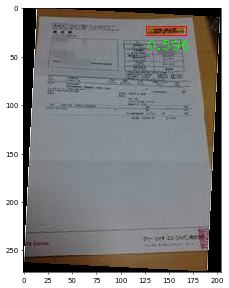

(-0.4939476549625397, 0.6928029656410217, (103, 151), (129, 21))
8


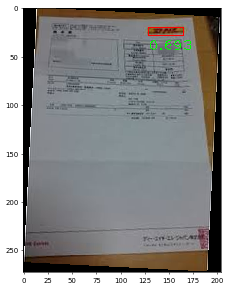

(-0.5532601475715637, 0.8116901516914368, (90, 152), (132, 21))
7


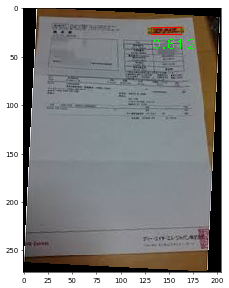

(-0.5583204627037048, 0.7015768885612488, (38, 4), (52, 100))
5
accuracy 0.812


In [2]:
# %matplotlib inline


# 画像の傾き検出
# @return 水平からの傾き角度
def get_degree(img):
    l_img = img.copy()
    gray_image = cv2.cvtColor(l_img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray_image, 50, 150, apertureSize=3)
    minLineLength = 120
    maxLineGap = 20
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 10, minLineLength, maxLineGap)

    sum_arg = 0
    count = 0
    for line in lines:
        for x1, y1, x2, y2 in line:
            arg = math.degrees(math.atan2((y2-y1), (x2-x1)))

            HORIZONTAL = 0
            DIFF = 10  # 許容誤差 -> -20 - +20 を本来の水平線と考える
            if arg != 0 and arg > HORIZONTAL - DIFF and arg < HORIZONTAL + DIFF:
                sum_arg += arg
                count += 1

    if count == 0:
        return HORIZONTAL
    else:
        return (sum_arg / count) - HORIZONTAL


def logo_recognition(target_img_path, temp_img_path):

    # 画像をグレースケールで読み込み
    img_target = cv2.imread(target_img_path)

    arg = get_degree(img_target)
    img_target = ndimage.rotate(img_target, arg)

    # img_target = cv2.fastNlMeansDenoising(img_target, None, 10, 7, 21)
    # img_target = cv2.Canny(img_target, 50, 200)

    # print('arg', arg)
    # plt.imshow(img_target), plt.show()
    img_target = cv2.cvtColor(img_target, cv2.COLOR_BGR2GRAY)

    i = 0
    score = 0
    for scale in np.linspace(0.2, 1.1, 20)[::-1]:

        img_temp = cv2.imread(temp_img_path, 0)
        h, w = img_temp.shape[:2]
        img_temp = cv2.resize(img_temp, (int(w*scale), int(h*scale)))
        h, w = img_temp.shape[:2]

    #     img_temp = cv2.fastNlMeansDenoising(img_temp, None, 10, 7, 21)
    #     img_temp = cv2.Canny(img_temp, 50, 200)

        res = cv2.matchTemplate(img_target, img_temp, cv2.TM_CCOEFF_NORMED)

        print(cv2.minMaxLoc(res))

        _, res_num, _, point = cv2.minMaxLoc(res)
        x2, y2, x3, y3 = point[0], point[1], point[0]+w, point[1]+h
        crr_score = round(res_num, 3)
        print(y3-y2)

        # 領域が小さい場合は、終了
        if y3-y2 < 7:
            break

        if crr_score > score:
            score = crr_score

#         elif crr_score > 0.5:
#             break

        color_src = cv2.imread(target_img_path)
        color_src = ndimage.rotate(color_src, arg)

    #     plt.imshow(img_temp), plt.show()
        color_src = cv2.rectangle(
            color_src, (x2, y2), (x3, y3), (0, 0, 255), 1)
        color_src = cv2.putText(color_src, str(
            crr_score), (x2, y3 + 15), cv2.FONT_HERSHEY_PLAIN, 1, (0, 255, 0))
        i += 1
    #     print(res_num)

        # 結果の表示
        plt.figure(figsize=(7, 7), dpi=50)
        plt.imshow(cv2.cvtColor(color_src, cv2.COLOR_BGR2RGB)), plt.show()
        filename = os.path.basename(target_img_path)
#         cv2.imwrite(filename, color_src)
    print('accuracy', score)


# 対象画像を指定
temp_img_path = 'img/logo_s.png'
target_img_path = 'img/index.jpg'

# logo_recognition(target_img_path, temp_img_path)

target_img_path = 'img/index1.jpg'
logo_recognition(target_img_path, temp_img_path)

target_img_path = 'img/index2.jpg'
# logo_recognition(target_img_path, temp_img_path)

target_img_path = 'img/seikyu.jpg'
# logo_recognition(target_img_path, temp_img_path)

15 40 141 36


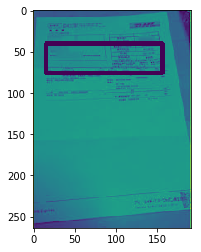

(<matplotlib.image.AxesImage at 0x20019674cc0>, None)

In [8]:
import cv2
import numpy as np

img = cv2.imread('img/index1.jpg', 0)

ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)
_, contours, _ = cv2.findContours(
    thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contours.sort(key=cv2.contourArea, reverse=True)
cnt = contours[1]

# epsilon = 0.1*cv2.arcLength(cnt,True)
# approx = cv2.approxPolyDP(cnt,epsilon,True)

# cv2.drawContours(img, approx, -1,(0, 0, 255),10)
x, y, w, h = cv2.boundingRect(cnt)
print(x, y, w, h)
cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 3)

plt.imshow(img), plt.show()